In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd

import librosa
import os
import warnings

from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
np.random.seed(42)

In [139]:
data_de, sample_rate_de = librosa.load('../data/test_data/test_audio_telugu_1.mp3')

print(f'Audio for Language: Telugu')
print(f'Audio Data Sample Rate: {sample_rate_de}')
print(f'Audio Data: {data_de}')

ipd.Audio(data=data_de, rate=sample_rate_de)

Audio for Language: Telugu
Audio Data Sample Rate: 22050
Audio Data: [ 2.1537330e-06 -3.0066044e-06  9.3615233e-07 ...  3.7065480e-04
  3.5918615e-04  1.6044824e-04]


In [140]:
test_data_path = '../data/test_data/'

In [141]:
def load_data(file_name: str) -> tuple:
    """Loads audio data from a file using librosa.

    Parameters:
        file_name (str): Path to the audio file.

    Returns:
        tuple: A tuple containing the sample rate and duration of the audio in seconds.
               If an error occurs during processing, returns (np.nan, np.nan).
    """

    try:
        # Load audio data and sample rate
        audio_data, sample_rate = librosa.load(file_name, sr=22050)

        # Calculate duration of audio in seconds
        audio_duration_sec = int(librosa.get_duration(y=audio_data, sr=sample_rate))

        return (sample_rate, audio_duration_sec)

    except Exception as e:
        # Print error message if an exception occurs during processing
        print(f"Error processing {file_name}: {str(e)}")

        # Return NaN values for sample rate and duration
        return (np.nan, np.nan)

In [142]:
test_language_dataframe = pd.DataFrame({'file_name': [test_data_path + file_name for file_name in os.listdir(test_data_path)]})

test_language_dataframe['language_label'] = test_language_dataframe['file_name'].str.split('_', expand=True).iloc[:, 3]
test_language_dataframe['file_size_kb'] = (test_language_dataframe['file_name'].apply(lambda x: os.path.getsize(x)) / 1024).round(3)

test_language_dataframe[['sample_rate', 'audio_duration_sec']] = test_language_dataframe['file_name'].apply(lambda file_name: pd.Series(load_data(file_name=file_name)))
test_language_dataframe.to_csv('../data/model_data/test_language_dataframe_v1.csv', index=False)

test_language_dataframe

,file_name,language_label,file_size_kb,sample_rate,audio_duration_sec
0,../data/test_data/test_audio_bengali_1.flac,bengali,185.367,22050,10
1,../data/test_data/test_audio_english_1.flac,english,208.781,22050,10
2,../data/test_data/test_audio_english_2.flac,english,165.432,22050,10
3,../data/test_data/test_audio_english_3.mp3,english,23.742,22050,10
4,../data/test_data/test_audio_english_4.mp3,english,24.566,22050,10
5,../data/test_data/test_audio_german_1.flac,german,230.990,22050,10
6,../data/test_data/test_audio_german_2.flac,german,226.154,22050,10
7,../data/test_data/test_audio_gujarati_1.flac,gujarati,218.465,22050,10
8,../data/test_data/test_audio_gujarati_2.mp3,gujarati,23.964,22050,10
9,../data/test_data/test_audio_hindi_1.flac,hindi,232.983,22050,10


In [143]:
test_language_dataframe = pd.read_csv('../data/model_data/test_language_dataframe_v1.csv')

In [144]:
def get_mfcc_features_mean(file_name: str) -> tuple:
    audio_data, sample_rate = librosa.load(file_name, sr=22050)

    return list(np.mean(librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40).T, axis=0))


test_language_dataframe['mfcc_features_mean'] = test_language_dataframe['file_name'].apply(lambda file_name: get_mfcc_features_mean(file_name=file_name))
test_language_dataframe.to_csv('../data/model_data/test_mfcc_feature_mean_dataframe_v1.csv', index=False)

test_language_dataframe

,file_name,language_label,file_size_kb,sample_rate,audio_duration_sec,mfcc_features_mean
0,../data/test_data/test_audio_bengali_1.flac,bengali,185.367,22050,10,"[-343.99377, 132.03488, 1.0807834, 15.115973, ..."
1,../data/test_data/test_audio_english_1.flac,english,208.781,22050,10,"[-382.6493, 83.89677, 7.330156, 15.05144, -3.5..."
2,../data/test_data/test_audio_english_2.flac,english,165.432,22050,10,"[-453.22855, 60.164062, 9.634525, 7.891491, -2..."
3,../data/test_data/test_audio_english_3.mp3,english,23.742,22050,10,"[-256.3562, 131.58954, -28.652885, 37.52898, -..."
4,../data/test_data/test_audio_english_4.mp3,english,24.566,22050,10,"[-292.91904, 124.43384, -17.826664, 30.209284,..."
5,../data/test_data/test_audio_german_1.flac,german,230.990,22050,10,"[-327.3837, 81.145966, -10.574126, 31.21862, -..."
6,../data/test_data/test_audio_german_2.flac,german,226.154,22050,10,"[-330.92395, 62.81966, -11.973674, 29.92887, -..."
7,../data/test_data/test_audio_gujarati_1.flac,gujarati,218.465,22050,10,"[-305.2257, 120.975945, -25.801857, 1.154108, ..."
8,../data/test_data/test_audio_gujarati_2.mp3,gujarati,23.964,22050,10,"[-251.03775, 131.98538, -42.19074, 43.394875, ..."
9,../data/test_data/test_audio_hindi_1.flac,hindi,232.983,22050,10,"[-319.4653, 63.542118, 14.6353245, 9.438244, 0..."


In [145]:
test_language_dataframe = pd.read_csv('../data/model_data/test_language_dataframe_v1.csv')

In [146]:
def get_mfcc_features(file_name: str) -> tuple:
    audio_data, sample_rate = librosa.load(file_name, sr=None)
    audio_data = librosa.resample(audio_data, orig_sr=sample_rate, target_sr=22050)

    return librosa.feature.mfcc(y=audio_data, sr=22050, n_mfcc=40).tolist()


test_language_dataframe['mfcc_features'] = test_language_dataframe['file_name'].apply(lambda file_name: get_mfcc_features(file_name=file_name))
test_language_dataframe.to_csv('../data/model_data/test_mfcc_feature_dataframe_v1.csv', index=False)

test_language_dataframe

,file_name,language_label,file_size_kb,sample_rate,audio_duration_sec,mfcc_features
0,../data/test_data/test_audio_bengali_1.flac,bengali,185.367,22050,10,"[[-559.4207763671875, -499.55419921875, -428.1..."
1,../data/test_data/test_audio_english_1.flac,english,208.781,22050,10,"[[-331.1968078613281, -359.9282531738281, -435..."
2,../data/test_data/test_audio_english_2.flac,english,165.432,22050,10,"[[-635.4437255859375, -631.6460571289062, -630..."
3,../data/test_data/test_audio_english_3.mp3,english,23.742,22050,10,"[[-549.9313354492188, -549.9313354492188, -549..."
4,../data/test_data/test_audio_english_4.mp3,english,24.566,22050,10,"[[-558.14697265625, -558.14697265625, -558.146..."
5,../data/test_data/test_audio_german_1.flac,german,230.990,22050,10,"[[-303.4532165527344, -248.85824584960938, -24..."
6,../data/test_data/test_audio_german_2.flac,german,226.154,22050,10,"[[-528.3310546875, -526.405517578125, -492.618..."
7,../data/test_data/test_audio_gujarati_1.flac,gujarati,218.465,22050,10,"[[-506.9770812988281, -357.4764099121094, -245..."
8,../data/test_data/test_audio_gujarati_2.mp3,gujarati,23.964,22050,10,"[[-571.7086181640625, -571.7086181640625, -571..."
9,../data/test_data/test_audio_hindi_1.flac,hindi,232.983,22050,10,"[[-568.3301391601562, -565.1420288085938, -499..."


In [147]:
test_language_dataframe = pd.read_csv('../data/model_data/test_language_dataframe_v1.csv')

In [148]:
def save_audio_spectrogram_plot(file_name: str, idx: int, label: str, figsize: tuple = (5, 5)):
    audio_data, sample_rate = librosa.load(file_name, sr=22050)

    fig = plt.figure(figsize=figsize, frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)

    plt.specgram(audio_data, Fs=sample_rate)

    fig.savefig(f'../data/model_data/test_spectrogram_images/{idx}_{label}.png', dpi=64)
    plt.close()


for idx, file_path in tqdm(enumerate(test_language_dataframe['file_name'].values), total=len(test_language_dataframe), desc=f"Processing"):
    if not os.path.exists(f'../data/model_data/test_spectrogram_images/'):
        os.makedirs(f'../data/model_data/spectrogram_images')

    save_audio_spectrogram_plot(file_name=file_path, idx=idx, label=file_path.split('_')[-2])

Processing: 100%|██████████| 21/21 [00:01<00:00, 17.07it/s]


In [149]:
X_test = pd.read_csv('../data/model_data/test_mfcc_feature_mean_dataframe_v1.csv', converters={'mfcc_features_mean': pd.eval})
y_test = X_test['language_label']

X_test = X_test.reset_index(drop=True)

language_labels_cols = list(pd.get_dummies(X_test['language_label'], dtype=np.int32).columns.values)

X_test = np.concatenate(X_test['mfcc_features_mean'].values, axis=0).reshape(-1, 40, 1)
y_test = pd.get_dummies(y_test.values, dtype=np.int32).values

X_test.shape, y_test.shape

((21, 40, 1), (21, 12))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.4286 - auc: 0.7910 - loss: 3.5157
[3.515655994415283, 0.4285714328289032, 0.7909709215164185]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

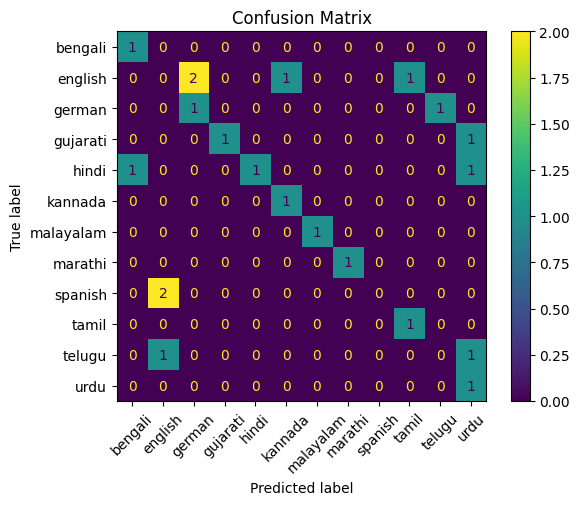

In [150]:
model = load_model('../data/models/language_detection_model_unscaled_v1.keras')
print(model.evaluate(X_test, y_test))

y_pred = model.predict(X_test)

y_test_argmax = [np.argmax(y_test[i,:]) for i in range(0, len(y_test))]
y_pred_argmax = [np.argmax(y_pred[i,:]) for i in range(0,len(y_pred))]

confusion_matrix_data = confusion_matrix(y_test_argmax, y_pred_argmax)

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

In [111]:
X_test = pd.read_csv('../data/model_data/test_mfcc_feature_dataframe_v1.csv', converters={'mfcc_features': pd.eval})
y_test = X_test['language_label']

X_test = X_test.reset_index(drop=True)

mfcc_features_matrix = []

for idx in range(len(X_test['mfcc_features'].values)):
   mfcc_features_matrix.append(np.array(X_test['mfcc_features'].values[idx])[:, :431])

language_labels_cols = list(pd.get_dummies(X_test['language_label'], dtype=np.int32).columns.values)

X_test = np.concatenate(mfcc_features_matrix, axis=0).reshape(-1, 40, 431, 1)
y_test = pd.get_dummies(y_test.values, dtype=np.int32).values

X_test.shape, y_test.shape

((16, 40, 431, 1), (16, 12))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.6875 - loss: 1.7976
[1.7975655794143677, 0.6875]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'bengali'),
  Text(1, 0, 'english'),
  Text(2, 0, 'german'),
  Text(3, 0, 'gujarati'),
  Text(4, 0, 'hindi'),
  Text(5, 0, 'kannada'),
  Text(6, 0, 'malayalam'),
  Text(7, 0, 'marathi'),
  Text(8, 0, 'spanish'),
  Text(9, 0, 'tamil'),
  Text(10, 0, 'telugu'),
  Text(11, 0, 'urdu')])

<Figure size 800x600 with 0 Axes>

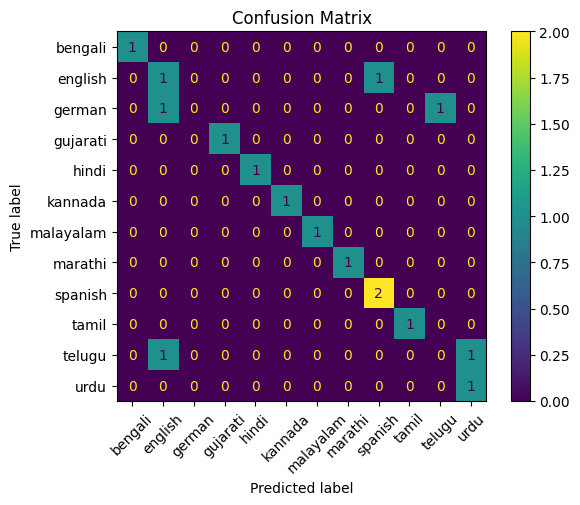

In [112]:
model = load_model('../data/models/language_detection_model_unscaled_v2.keras')
print(model.evaluate(X_test, y_test))

y_pred = model.predict(X_test)

y_test_argmax = [np.argmax(y_test[i,:]) for i in range(0, len(y_test))]
y_pred_argmax = [np.argmax(y_pred[i,:]) for i in range(0,len(y_pred))]

confusion_matrix_data = confusion_matrix(y_test_argmax, y_pred_argmax)

plt.figure(figsize = (8, 6))
cmd = ConfusionMatrixDisplay(confusion_matrix_data, display_labels=language_labels_cols)
cmd.plot()

plt.title('Confusion Matrix')
plt.xticks(rotation=45)

In [134]:
m1 = np.random.random(12)
m2 = np.random.random(12)
m3 = np.random.random(12)

In [135]:
m1, m2, m3

(array([0.83244264, 0.21233911, 0.18182497, 0.18340451, 0.30424224,
        0.52475643, 0.43194502, 0.29122914, 0.61185289, 0.13949386,
        0.29214465, 0.36636184]),
 array([0.45606998, 0.78517596, 0.19967378, 0.51423444, 0.59241457,
        0.04645041, 0.60754485, 0.17052412, 0.06505159, 0.94888554,
        0.96563203, 0.80839735]),
 array([0.30461377, 0.09767211, 0.68423303, 0.44015249, 0.12203823,
        0.49517691, 0.03438852, 0.9093204 , 0.25877998, 0.66252228,
        0.31171108, 0.52006802]))

In [136]:
np.argmax(m1)

0

In [151]:
np.argsort(m1)[-3:][::-1]

array([0, 8, 5], dtype=int64)